# Clasificador Pokemon

Vamos a crear un clasificador de pokemons. Para ello, nos basaremos en las imágenes de la carpeta ``dataset``, donde deberemos recorrer carpeta a carpeta, imagen a imagen, todas y cada una de ellas, guardándolas como arrays, así como la clase (el pokemon) al que pertenece.

Cuidado con los ficheros ``.svg``, elimínalos o no los trates cuando detectes uno de ellos, ya que darán problemas. Además, convendr
ia empezar redimensionando las imágenes para no ocupar demasiado en memoria.

In [61]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf   

In [145]:
pokemons = os.listdir('dataset')
pokemons_label = {poke: i for i, poke in enumerate(os.listdir('dataset'))}

nb_classes = len(pokemons)

IMAGE_SIZE = (128, 128)

In [3]:
# print(pokemons)
print(pokemons_label)
print(type(list(pokemons_label.keys())[0]))

{'Abra': 0, 'Aerodactyl': 1, 'Alakazam': 2, 'Arbok': 3, 'Arcanine': 4, 'Articuno': 5, 'Beedrill': 6, 'Bellsprout': 7, 'Blastoise': 8, 'Bulbasaur': 9, 'Butterfree': 10, 'Caterpie': 11, 'Chansey': 12, 'Charizard': 13, 'Charmander': 14, 'Charmeleon': 15, 'Clefable': 16, 'Clefairy': 17, 'Cloyster': 18, 'Cubone': 19, 'Dewgong': 20, 'Diglett': 21, 'Ditto': 22, 'Dodrio': 23, 'Doduo': 24, 'Dragonair': 25, 'Dragonite': 26, 'Dratini': 27, 'Drowzee': 28, 'Dugtrio': 29, 'Eevee': 30, 'Ekans': 31, 'Electabuzz': 32, 'Electrode': 33, 'Exeggcute': 34, 'Exeggutor': 35, 'Farfetchd': 36, 'Fearow': 37, 'Flareon': 38, 'Gastly': 39, 'Gengar': 40, 'Geodude': 41, 'Gloom': 42, 'Golbat': 43, 'Goldeen': 44, 'Golduck': 45, 'Golem': 46, 'Graveler': 47, 'Grimer': 48, 'Growlithe': 49, 'Gyarados': 50, 'Haunter': 51, 'Hitmonchan': 52, 'Hitmonlee': 53, 'Horsea': 54, 'Hypno': 55, 'Ivysaur': 56, 'Jigglypuff': 57, 'Jolteon': 58, 'Jynx': 59, 'Kabuto': 60, 'Kabutops': 61, 'Kadabra': 62, 'Kakuna': 63, 'Kangaskhan': 64, 'Kingl

### Divide los datos en train y test de forma aleatoria:

## Investigar imagenes

¿Cuántas imágenes hay de train? ¿Y de test? ¿Hemos hecho bien la división?

## Escalamos

## Visualizamos

Muestra una imagen aleatoria de las de entrenamiento para ver que tenemos bien los datos:

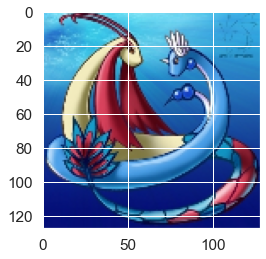

In [205]:
plt.imshow(train_images[21])

In [152]:
train_labels[0]

78

Al igual que hemos hecho en otro ejercicio, muestra una matriz de fotos con la clase (el Pokémon) correspondiente:

### Separación train/validation:

En este caso separaremos de forma manual para asegurarnos que en train se utiiza al menos 1 imagen de cada clase, para lo que utilizaremos el parámetro ``stratify`` de ``train_test_split``, donde le idicaremos los labels:

## Modelo

Crea un modelo de redes neuronales acorde a lo que hemos visto con el tratamiento de imágenes, entrénalo y evalúalo en test:

Representa las pérdidas de train frente a las de validación en una gráfica. Del mismo modo, representa el accuracy de train frente al de validación a lo largo de las EPOCHS

Vuelve a imprimir una matriz de 25 imágenes con su clase asociada, pero esta vez que sean las imágenes de test con las etiquetas que hemos predicho:

## ¿Cuales son los pokemon que mejor predecimos? ¿Y los que peor?

Puedes hacer un DataFrame con % de aciertos y fallos por Pokémon:

### EXTRA: 

#### 1. Prueba a modificar el modelo hasta conseguir un buen resultado

En base a lo que vayas obteniendo, tampoco esperes un resultado muy bueno si no se puede:

#### 2. Vamos a intentar predecir algo más ¿fácil?

Ahora intentaremos predecir el tipo del pokemon, que en teoría, al reducir las opciones, sería más sencillo.

Para ello, tendremos que recurrir al dataframe que vimos el otro día (``df_poke``), que nos identifica el nombre del Pokémon y sus tipos. En este caso, quédate con el ``Type 1`` para crearnos los nuevos labels, es decir, el nuevo target.

In [204]:
df_poke = pd.read_csv('../../../data/Pokemon.csv', sep=',', encoding='latin1', index_col=['Name'])
df_poke

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,2,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,3,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Dratini,147,Dragon,NaN,300,41,64,45,50,50,50,1,False
Dragonair,148,Dragon,NaN,420,61,84,65,70,70,70,2,False
Dragonite,149,Dragon,Flying,600,91,134,95,100,100,80,3,False


'C:\\Users\\TheBridge\\Desktop\\bootcamp_thebridge_PTSep20\\bootcamp_thebridge_PTSep20\\Bloque 3 - Machine Learning\\05_Deep_Learning\\4-Ejercicio Extra'

### EXTRA: ¿Y si utilizamos una red preentrenada?

Volviendo al caso original, donde tratamos de predecir el Pokémon, investiga lo que ocurriría al utilizar una red preentrenada:
  1. Si te pica la curiosidad, utiliza directamente una red preentrenada con los datos de ImageNet
  2. Añade tu parte a una red preentrenada para ver si puedes mejorar los resultados

### EXTRA: ¿Y si lo probamos con los tipos?